![](../img/330-banner.png)

# Lecture 2: Terminology, Baselines, Decision Trees

- UBC 2022-23, CPSC 330, Section 203
- Instructor: Amir Abdi, call me **Amir**, **UBC** PhD Alumni, Principal Applied Scientist **Microsoft**, Co-founder/CTO startup

**Contact:** Piazza + Office Hours (Mondays, 5-6 PM, virtual on Zoom)

**iClicker cloud join link: https://join.iclicker.com/EMMJ**
<br><br><br><br><br><br><br><br><br>

## 📹 PreWatch and PostWatch:
- Pre-watch: 
  - [2.1](https://youtu.be/YNT8n4cXu4A) 
  - [2.2](https://youtu.be/6eT5cLL-2Vc)
- After lecture: 
  - [2.3](https://youtu.be/Hcf19Ij35rA)
  - [2.4](https://youtu.be/KEtsfXn4w2E)                                                                              

### Announcements 

- Whether 330 can be a pre-requisite of 440: asking the department, have no update.
- First deliverables
  - First homework assignment is due this coming **Monday, Jan 16th, at 11:59pm**
  - The assignment is available on **GitHub**
  - You must do the first homework assignment **alone**
  - The **Syllabus quiz** is available on [Canvas](https://canvas.ubc.ca/courses/106375/quizzes/584868) and is due **this coming Monday, Jan 16th, at 11:59pm.**
- You can find the tentative due dates for all deliverables on the [course Github page](https://github.com/UBC-CS/cpsc330-2022W2). 

#### Note
- Please monitor Piazza (especially pinned posts and instructor posts) for announcements. 


#### Takeaways from "Why want to learn ML?" from last session
- Language Models, NLP, GPT/ChatGPT, Transformers


<br><br>

### Learning outcomes 
From this lecture, you will be able to 

Definitions

- identify whether a given problem could be solved using **supervised** machine learning or not; 
- differentiate between supervised and **unsupervised machine** learning;
- explain machine learning terminology such as **features, targets, predictions, training**, and **error**;
- explain the difference between **parameters** and **hyperparameters**; 
- differentiate between **classification** and **regression** problems;


ML Models
- explain the **`fit`** and **`predict`** paradigm and use **`score`** method of ML models; 

Decision Trees
- describe how **decision tree** prediction works;
- use `DecisionTreeClassifier` and `DecisionTreeRegressor` to build decision trees using `scikit-learn`; 

<br><br><br><br><br><br><br><br>

## Legends

| <img src="https://upload.wikimedia.org/wikipedia/commons/f/f8/This_is_the_photo_of_Arthur_Samuel.jpg" width="100"> | <img src="http://www.cs.cmu.edu/~tom/TomHead2-6-22-22.jpg" width="100">  |
| ----------- | ----------- |
| Arthur Samuel       | Tom Mitchell       |
| (1901-1990)    | 1951 - Now       |
| First computer learning program | 1997 ML Texbook, CMU Prof |



<br><br><br><br>

## Terminology [[Pre-watch video](https://youtu.be/YNT8n4cXu4A)]

You will see a lot of variable terminology in machine learning and statistics. Let's familiarize ourselves with some of the basic terminology used in ML. 

### Big picture and datasets

In this lecture, we'll talk about our first machine learning model: **Decision trees**

### Toy datasets 
Later in the course we will use larger datasets from Kaggle, for instance.  
But for our first couple of lectures, we will be working with the following three toy datasets (all 3 added to the repo):  

- [Quiz2 grade prediction classification dataset](../data/quiz2-grade-toy-classification_aa.csv)
- [Quiz2 grade prediction regression dataset](../data/quiz2-grade-toy-regression.csv)
- [Canada USA cities dataset](../data/canada_usa_cities.csv)

----
If it's not necessary for you to understand the `code` package, it is designed to avoid clutter in this notebook  
(e.g., most of the plotting code is going to be in `code/plotting_functions.py`)

----

### Tabular data
**tabular** format is a common modality of data, where 
- rows are **examples** and 
- columns are **features**. 
  - One of the columns is typically the **target**. 

<img src="../img/sup-ml-terminology.png" height="1000" width="1000"> 

Terminology:

- **Features** 
: Features are relevant characteristics of the problem. Features are typically denoted by $X$ and the number of features is usually denoted by $d$.  

- **Target**
: Target is the feature we want to predict (typically denoted by $y$). 

- **Sample (Example)** 
: A row of feature values. The number of samples can be denoted by $n$. 

- **Training**
: The process of learning the mapping between the features ($X$) and the target ($y$). 

#### Example: Tabular data for grade prediction


Learn Terminology via Example:
>  Imagine that you are taking a course with four home work assignments and two quizzes. You and your friends are quite nervous about your quiz2 grades and you want to know how will you do based on your 
> - previous performance and 
> - some other attributes.   
> 
> So you decide to collect some data from your friends from last year and train a supervised machine learning model for quiz2 grade prediction. 

**Setup**

In [1]:
# Some helper functions to save us time
import sys
sys.path.append("../code/.")

import glob
import matplotlib.pyplot as plt
from IPython.display import HTML
import pandas as pd

plt.rcParams["font.size"] = 16
pd.set_option("display.max_colwidth", 200)

In [2]:
classification_df = pd.read_csv("../data/quiz2-grade-toy-classification_aa.csv")
classification_df.head()

,ml_experience,class_attendance,lab1,lab2,lab3,lab4,quiz1,quiz2
0,1,1,92,93,84,91,92,A+
1,0,0,94,90,80,83,91,not A+
2,0,0,78,85,83,80,80,not A+
3,0,1,91,94,92,91,89,A+
4,0,1,77,83,90,92,85,A+


<br><br><br><br><br><br><br><br><br>
So the first step in training a supervised machine learning model is separating `X` and `y`. 

In [3]:
X = classification_df.drop(columns=["quiz2"])
y = classification_df["quiz2"]
X.head()

,ml_experience,class_attendance,lab1,lab2,lab3,lab4,quiz1
0,1,1,92,93,84,91,92
1,0,0,94,90,80,83,91
2,0,0,78,85,83,80,80
3,0,1,91,94,92,91,89
4,0,1,77,83,90,92,85


In [4]:
X.shape

(20, 7)

In [5]:
y.head()

0        A+
1    not A+
2    not A+
3        A+
4        A+
Name: quiz2, dtype: object

#### Example: Tabular data for the housing price prediction

Here is an example of tabular data for housing price prediction. You can download the data from [here](https://www.kaggle.com/harlfoxem/housesalesprediction). 

In [6]:
housing_df = pd.read_csv("../data/kc_house_data.csv")
housing_df

housing_df.drop(["id", "date"], axis=1, inplace=True)
HTML(housing_df.head().to_html(index=False))

price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
X = housing_df.drop(columns=["price"])
y = housing_df["price"]
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
X.shape

(21613, 18)

In [9]:
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

<br><br><br><br><br><br>
Training data shapes the reality of models!  
(Model's perception of world is shaped by the training data)
<br><br><br><br><br><br>
To a machine, column names (features) have no meaning.   
Only feature values and how they vary across examples mean something. 
<br><br><br><br><br><br><br>

<br><br>

#### Alternative terminology for examples, features, targets, and training

- **samples** = examples = rows = records = instances = *inputs*
- **features** = predictors = regressors = independent variables = covariates = *inputs*
- **targets** = outputs = outcomes = dependent variable = labels (if categorical)
- **training** = learning = fitting


Check out [the UBC Master of Data Science (MDS) terminology document](https://ubc-mds.github.io/resources_pages/terminology/). 


<br><br>

### Supervised learning vs. Unsupervised learning

In **supervised learning**, 
- training data comprises a set of features ($X$) and their corresponding targets ($y$). 
- We wish to find a **model function $f$** that relates $X$ to $y$ 
  - given $X_{train}$ and $y_{train}$  :   $y_{train} = f(X_{train})$
- Then use that model function **to predict the targets** of new examples. 
  - given $X_{test}$ and $f$  :   $y_{test} = f(X_{test})$


<img src="../img/sup-learning.png" height="900" width="900">


In **unsupervised learning** 
- training data consists of observations ($X$) **without any corresponding targets**. 
- Unsupervised learning could be used to (not an exhaustive list)
  - **group (cluster) similar things together**, or
  - summarize data, or
  - learn patterns, or
  - Learn association rules.  
  


<img src="../img/unsup-learning.png" alt="" height="900" width="900">

<br><br>

### Classification and Regression 
Two **most common** supervised machine learning problems are:
- **Classification problem**: predicting among two or more discrete classes
    - Example1: Predict whether a patient has a liver disease or not &emsp;  (two classes -> binary classification)
    - Example2: Predict whether a student would get A+ or not &emsp;&emsp; &emsp;(two classes -> binary classification)
- **Regression problem**: predicting a continuous value
    - Example1: Predict housing prices 
    - Example2: Predict a student's score in quiz2.

<img src="../img/classification-vs-regression.png" height="1500" width="1500"> 

In [10]:
# quiz2 classification toy data
classification_df = pd.read_csv("../data/quiz2-grade-toy-classification_aa.csv")
print(classification_df.shape)
classification_df.head(4)

(20, 8)


,ml_experience,class_attendance,lab1,lab2,lab3,lab4,quiz1,quiz2
0,1,1,92,93,84,91,92,A+
1,0,0,94,90,80,83,91,not A+
2,0,0,78,85,83,80,80,not A+
3,0,1,91,94,92,91,89,A+


In [11]:
# quiz2 regression toy data
regression_df = pd.read_csv("../data/quiz2-grade-toy-regression.csv")
print(regression_df.shape)
regression_df.head(4)

(7, 8)


,ml_experience,class_attendance,lab1,lab2,lab3,lab4,quiz1,quiz2
0,1,1,92,93,84,91,92,90
1,1,0,94,90,80,83,91,84
2,0,0,78,85,83,80,80,82
3,0,1,91,94,92,91,89,92


## ❓❓ Questions for you

### Exercise 2.1

1. How many examples and features are there in the housing price data above? 
> You can use `df.shape` to get number of rows and columns in a dataframe. 
2. For each of the following examples what would be the relevant **features** and what would be the **target**?
    1. Sentiment analysis
    2. Financial Fraud Detection 
    3. Face recognition 

<br><br>

### iClicker Exercise 2.2 

<img src="img_aa/iclicker_qr_code.png" height="200" width="200"> 

**iClicker cloud join link: https://join.iclicker.com/EMMJ**




**Select all of the following statements which are examples of supervised machine learning**

- (A) Finding groups of similar properties in a real estate data set.
- (B) Predicting whether someone will have a heart attack or not on the basis of demographic, diet, and clinical measurement. 
- (C) Grouping articles on different topics from different news sources (something like the Google News app). 
- (D) Detecting credit card fraud based on examples of fraudulent and non-fraudulent transactions.
- (E) Given some measure of employee performance, identify the key factors which are likely to influence their performance.

<br><br>

### iClicker Exercise 2.3 


Select **all of the following statements** (multiple) which are examples of regression problems

- (A) Predicting the price of a house based on features such as number of bedrooms and the year built.
- (B) Predicting if a house will sell or not based on features like the price of the house, number of rooms, etc.
- (C) Predicting percentage grade in CPSC 330 based on past grades.
- (D) Predicting whether you should bicycle tomorrow or not based on the weather forecast.
- (E) Predicting appropriate thermostat temperature based on the wind speed and the number of people in a room.   

<br><br><br><br>

## Baselines [[video](https://youtu.be/6eT5cLL-2Vc)]

- A baseline is a simple statistical or vanilla ML model you first try on the data
- Baselines help you with sanity check of the problem
- Baselines also give you some perspective on the "gained performance" of your best model





Example baseline:
- Predict next grade of a student given their previous grades
  - Baseline: average of student's previous grades
- Predict whether the price of stock XYZ goes up (bull) or down (bear) next week?
  - Baseline: if it went down last week, predict upwards trend, and vice versa.
- Given a multi-choice exam, read all the questions and choices (Natural Language text) and answer correctly.
  - Baseline: Random or always pick c (estimated expectation of 1/n, where n = numberOfChoices)
  

Examples of simple ML model baselines (depends on the problem):
- Decision tree (will learn today!)
- linear regression (lecture 7)
- A multi-layer perceptron (learn end of march)

<br><br><br><br><br><br><br><br><br>

<br><br><br><br>

<br><br><br><br>

## Decision trees [[video](https://youtu.be/Hcf19Ij35rA)]

### Steps to train a classifier using `sklearn` 

1. Read the data
2. Create $X$ and $y$
3. Create a classifier object
4. `fit` the classifier
5. `predict` on new examples
6. `score` the model


Let's build a very simple supervised machine learning model for quiz2 grade prediction problem. 

In [12]:
classification_df = pd.read_csv("../data/quiz2-grade-toy-classification_aa.csv")
classification_df.head()

,ml_experience,class_attendance,lab1,lab2,lab3,lab4,quiz1,quiz2
0,1,1,92,93,84,91,92,A+
1,0,0,94,90,80,83,91,not A+
2,0,0,78,85,83,80,80,not A+
3,0,1,91,94,92,91,89,A+
4,0,1,77,83,90,92,85,A+


In [13]:
classification_df['quiz2'].value_counts()

not A+    11
A+         9
Name: quiz2, dtype: int64

#### Create $X$ and $y$

- $X$ &rarr; Feature vectors
- $y$ &rarr; Target

In [14]:
X = classification_df.drop(columns=["quiz2"])
y = classification_df["quiz2"]

### Writing a traditional program to predict quiz2 grade

- Forget about ML for a second. If you are asked to write a program to predict whether a student gets an A+ or not in quiz2, how would you go for it?  
- For simplicity, let's binarize the feature values. 


<img src="../img/quiz2-grade-toy.png" height="700" width="700"> 


- Can we write a program with if/else?

```
    if class_attendance == 1 and quiz1 == 1:
        quiz2 == "A+"
    elif class_attendance == 1 and lab3 == 1 and lab4 == 1:
        quiz2 == "A+"
    ...
```

-------
- How many possible rule combinations there could be with the given 7 binary features? 
    - Gets unwieldy pretty quickly 


- What if you had more features?
    
- What if you had 1M samples? (instead of only 20)

-------

**Decision tree algorithm**: A machine learning algorithm to derive such rules from data in a principled way.  

-------

### Building decision trees with `sklearn`


Let's build a very simple supervised machine learning model for quiz2 grade prediction problem. 

In [15]:
import pandas as pd
classification_df = pd.read_csv("../data/quiz2-grade-toy-classification_aa.csv")

classification_df = classification_df.rename(columns={"quiz2": "target"})
X = classification_df.drop(columns=["target"])
y = classification_df["target"]

# columns = ["lab1", "lab2", "lab3", "lab4", "quiz1"]
print("shape:", X.shape)
X.head()

shape: (20, 7)


,ml_experience,class_attendance,lab1,lab2,lab3,lab4,quiz1
0,1,1,92,93,84,91,92
1,0,0,94,90,80,83,91
2,0,0,78,85,83,80,80
3,0,1,91,94,92,91,89
4,0,1,77,83,90,92,85


In [16]:
y.head()

0        A+
1    not A+
2    not A+
3        A+
4        A+
Name: target, dtype: object

#### Create a classifier object

- `import` the appropriate classifier 
- Create an object of the classifier 

https://scikit-learn.org/stable/

In [17]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier() # Create a decision tree

- Train the model

In [18]:
model.fit(X, y) # Fit a decision tree

DecisionTreeClassifier()

- `score` (evaluate) the model
  - How do you know how well your model is doing?
  - For classification problems, by default, `score` gives the **accuracy** of the model, i.e., proportion of correctly predicted targets.  

    $accuracy = \frac{\text{correct predictions}}{\text{total examples}}$   

In [19]:
model.score(X, y) # Evaluate the model

1.0

Wow, 100 accuracy... That's good news!  

Let's visualize the tree

[Text(0.3, 0.9166666666666666, 'lab3 <= 83.5\ngini = 0.495\nsamples = 20\nvalue = [9, 11]'),
 Text(0.2, 0.75, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.4, 0.75, 'quiz1 <= 83.5\ngini = 0.459\nsamples = 14\nvalue = [9, 5]'),
 Text(0.2, 0.5833333333333334, 'lab3 <= 94.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.1, 0.4166666666666667, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.3, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6, 0.5833333333333334, 'lab4 <= 83.5\ngini = 0.32\nsamples = 10\nvalue = [8, 2]'),
 Text(0.5, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.7, 0.4166666666666667, 'lab2 <= 94.5\ngini = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(0.6, 0.25, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.8, 0.25, 'lab2 <= 95.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.7, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.9, 0.08333333333333333, 'gini = 0.0\nsamples = 1\

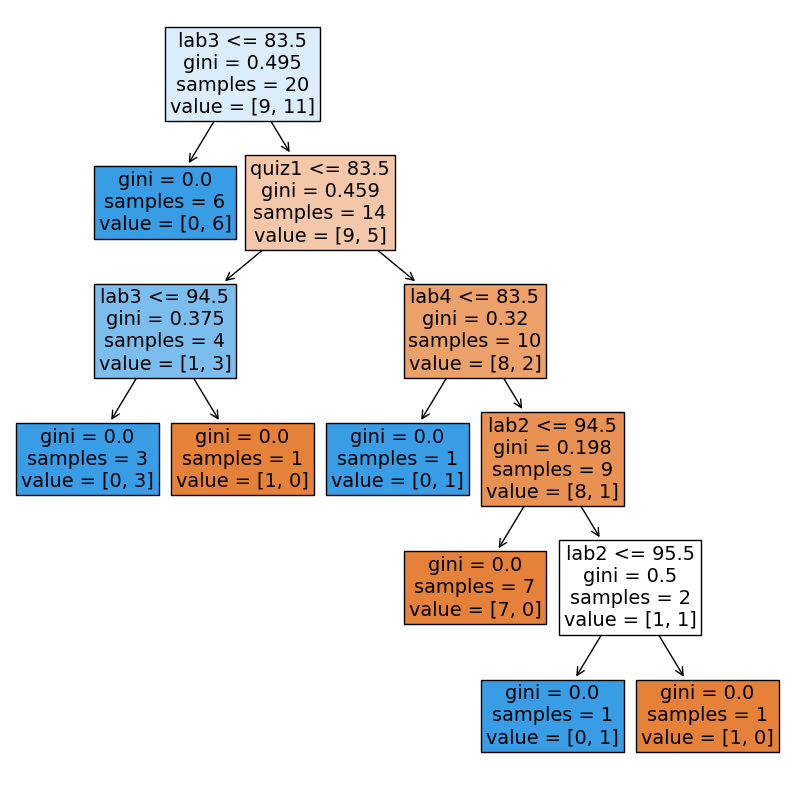

In [20]:
plt.figure(figsize=(10, 10))
tree.plot_tree(model, feature_names=X.columns, filled=True)

### Some terminology related to trees 

Here is a commonly used terminology in a typical representation of decision trees. 
- **A root node**: represents the first condition to check or question to ask
- **A branch**: connects a node (condition) to the next node (condition) in the tree. Each branch typically represents either true or false. 
- **A leaf node**: represents the predicted class/value when the path from root to the leaf node is followed. 
- **An internal node** : represents conditions within the tree
- **Tree depth**: The number of edges on the path from the root node to the farthest away leaf node.

### How does `predict` work? 

In [21]:
import numpy as np

new_example = pd.DataFrame(data=[[0,1,0,89,80,77, 90]], columns=X.columns)
new_example_pred = model.predict(new_example)

print(new_example, '\n')
print("prediction:", new_example_pred)

   ml_experience  class_attendance  lab1  lab2  lab3  lab4  quiz1
0              0                 1     0    89    80    77     90 

prediction: ['not A+']


In summary, given a learned tree and a test example, during prediction time,  
- Start at the top of the tree. Ask binary questions at each node and follow the appropriate path in the tree. Once you are at a leaf node, you have the prediction. 
- Note that the model only considers the features which are in the learned tree and ignores all other features. 

<br><br><br><br><br><br><br>

In [22]:
# Let's test a weird sample
new_example = pd.DataFrame(data=[[0,0,0,0,100,0,0]], columns=X.columns)
new_example_pred = model.predict(new_example)

print(new_example, '\n')
print("prediction:", new_example_pred)

   ml_experience  class_attendance  lab1  lab2  lab3  lab4  quiz1
0              0                 0     0     0   100     0      0 

prediction: ['A+']


<br><br><br><br><br><br>
Training data shapes the reality of models!  
(Model's perception of world is shaped by the training data)
<br><br><br><br><br><br><br>

### How does `fit` work? (what were those `gini` values in the plot?)


- Which features are most useful for classification? 
- Minimize **impurity** at each question
- Common criteria to minimize impurity: [gini index (gini impurity)](https://scikit-learn.org/stable/modules/tree.html#classification-criteria), information gain, cross entropy

[Text(0.3, 0.9166666666666666, 'lab3 <= 83.5\ngini = 0.495\nsamples = 20\nvalue = [9, 11]'),
 Text(0.2, 0.75, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.4, 0.75, 'quiz1 <= 83.5\ngini = 0.459\nsamples = 14\nvalue = [9, 5]'),
 Text(0.2, 0.5833333333333334, 'lab3 <= 94.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.1, 0.4166666666666667, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.3, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6, 0.5833333333333334, 'lab4 <= 83.5\ngini = 0.32\nsamples = 10\nvalue = [8, 2]'),
 Text(0.5, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.7, 0.4166666666666667, 'lab2 <= 94.5\ngini = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(0.6, 0.25, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.8, 0.25, 'lab2 <= 95.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.7, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.9, 0.08333333333333333, 'gini = 0.0\nsamples = 1\

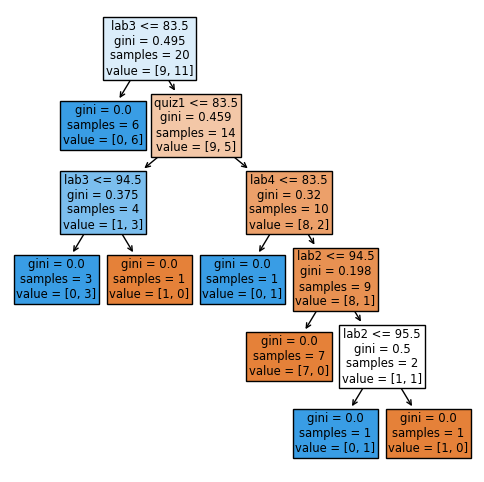

In [23]:
plt.figure(figsize=(6, 6))
tree.plot_tree(model, feature_names=X.columns, filled=True)

#### Gini Impurity

- Training: Tree each built from root down to the leaves
- At each node, the algorithm should make 2 decisions:
  - which **feature** to use
  - what **threshold** to set to partition samples into left and right branches
  
Gini Impurity: 
- choose the **feature** and **threshold** that minimizes **Gini Impurity**

Let's look at some samples:
- t1=[A+, A+, A+, A+] &emsp; &emsp;&emsp; &emsp;--> Pure --> gini_impurity(t1) = 0
- t2=[not A+, not A+, not A+] &emsp;--> pure --> gini_impurity(t2) = 0
<br><br><br><br><br>

In [24]:
classification_df[classification_df.lab3 <= 83.5]

,ml_experience,class_attendance,lab1,lab2,lab3,lab4,quiz1,target
1,0,0,94,90,80,83,91,not A+
2,0,0,78,85,83,80,80,not A+
5,0,0,70,73,68,74,71,not A+
7,0,1,95,93,69,79,75,not A+
15,1,0,92,85,67,94,92,not A+
17,1,0,86,89,65,86,87,not A+


$Gini_{lab3}(D_{lab3 <= 83.5}) = 0$

**Definition of Gini Impurity**: A measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset.

$Gini(D) = 1 - \sum_{i=1}^{C}p_i^{2}$

$D$: set of data  
$p_i$ = probability of samples belonging to class $i$ =  $ \frac{N(class_i)}{N(total)} $

In [25]:
classification_df[classification_df.lab3 > 83.5]

,ml_experience,class_attendance,lab1,lab2,lab3,lab4,quiz1,target
0,1,1,92,93,84,91,92,A+
3,0,1,91,94,92,91,89,A+
4,0,1,77,83,90,92,85,A+
6,1,0,80,88,89,88,91,A+
8,0,0,97,90,94,99,80,not A+
9,0,1,95,95,94,94,85,not A+
10,1,1,98,86,95,95,78,A+
11,1,1,95,88,93,92,85,A+
12,1,1,98,96,96,99,100,A+
13,0,1,95,94,96,95,100,A+


$p(A+) = 9 / 14$

$p(Not A+) = 5 / 14$

$Gini_{lab3}(D_{lab3 > 83.5}) = 1 - (9/14)^2 + (5/14)^2 = 1 - 0.413265306122449 + 0.127551020408163 = 0.459183673469388$  

$Gini_{lab3} = 14/20 * 0.459183673469388 + 6/20 * 0 = 0.321428571428572$


-------
Now, let's calculate the total Gini of making the above decision:    

(WEIGHED SUM)

$Gini_F = \frac{n_1}{n} * Gini(D_1) + \frac{n_2}{n} * Gini(D_2)$

$Gini_{lab3} = 0.459$
<br><br><br><br><br>

### Exercise 2.4
- What is Gini impurity of all leaves?  
A) 0  
B) 0.5  
C) 1.0  
D) Could have any value.  
  
- What was the Gini Impurity of the original data, before any partitioning?  
A) 0  
B) 0.495  
C) 1.0  
D) Can't be calculated

<br><br><br><br><br><br><br>

## Break (5 min)

![](../img/eva-coffee.png)

- We will try to take a 5-minute break half way through every class.
<br><br><br><br><br>

### Decision tree for regression problems

- We can also use decision tree algorithm for regression. 
- Instead of gini, we use [some other criteria](https://scikit-learn.org/stable/modules/tree.html#mathematical-formulation) for splitting. A common one is mean squared error (MSE). (More on this in later videos.)
- `scikit-learn` supports regression using decision trees with `DecisionTreeRegressor` 
    - `fit` and `predict` paradigms similar to classification
    - `score` returns a value known as [$R^2$ score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score).     
        - The maximum $R^2$ is 1 for perfect predictions. 
        - It can be negative which is very bad (worse than [DummyRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html)). 

What is [DummyRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html)?
- Always predict the mean or median of the dataset

In [26]:
regression_df = pd.read_csv("../data/quiz2-grade-toy-regression.csv")
regression_df.head()

,ml_experience,class_attendance,lab1,lab2,lab3,lab4,quiz1,quiz2
0,1,1,92,93,84,91,92,90
1,1,0,94,90,80,83,91,84
2,0,0,78,85,83,80,80,82
3,0,1,91,94,92,91,89,92
4,0,1,77,83,90,92,85,90


In [27]:
from sklearn import tree
X = regression_df.drop(["quiz2"], axis=1)
y = regression_df["quiz2"]

reg_model = tree.DecisionTreeRegressor()
reg_model.fit(X, y); 

regression_df["predicted_quiz2"] = reg_model.predict(X)
print("R^2 score on the training data: %0.3f\n\n" % (reg_model.score(X, y)))
regression_df.head()

R^2 score on the training data: 1.000




,ml_experience,class_attendance,lab1,lab2,lab3,lab4,quiz1,quiz2,predicted_quiz2
0,1,1,92,93,84,91,92,90,90.0
1,1,0,94,90,80,83,91,84,84.0
2,0,0,78,85,83,80,80,82,82.0
3,0,1,91,94,92,91,89,92,92.0
4,0,1,77,83,90,92,85,90,90.0


[Text(0.5, 0.875, 'lab3 <= 83.5\nsquared_error = 33.347\nsamples = 7\nvalue = 86.286'),
 Text(0.2, 0.625, 'quiz1 <= 75.5\nsquared_error = 14.889\nsamples = 3\nvalue = 80.333'),
 Text(0.1, 0.375, 'squared_error = 0.0\nsamples = 1\nvalue = 75.0'),
 Text(0.3, 0.375, 'quiz1 <= 85.5\nsquared_error = 1.0\nsamples = 2\nvalue = 83.0'),
 Text(0.2, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = 82.0'),
 Text(0.4, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = 84.0'),
 Text(0.8, 0.625, 'lab2 <= 93.5\nsquared_error = 0.688\nsamples = 4\nvalue = 90.75'),
 Text(0.7, 0.375, 'class_attendance <= 0.5\nsquared_error = 0.222\nsamples = 3\nvalue = 90.333'),
 Text(0.6, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = 91.0'),
 Text(0.8, 0.125, 'squared_error = 0.0\nsamples = 2\nvalue = 90.0'),
 Text(0.9, 0.375, 'squared_error = 0.0\nsamples = 1\nvalue = 92.0')]

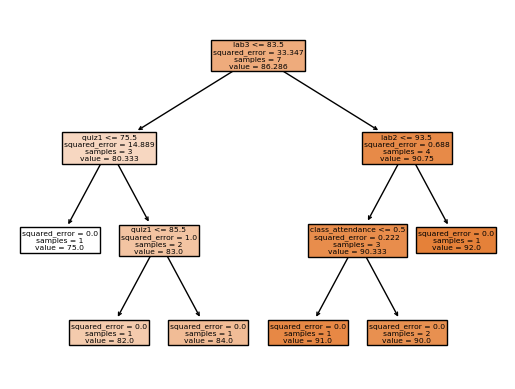

In [28]:
tree.plot_tree(reg_model, feature_names=X.columns, filled=True)

<br><br>

## ❓❓ Questions for you

### iClicker Exercise 2.5 

**iClicker cloud join link: https://join.iclicker.com/EMMJ**

**Select all of the following statements which are TRUE (multi-answer).**

- (A) If a baseline regressor always predicts the mean of the data (e.g `DummyRegressor`), change in features would change its predictions. 
- (B) `predict` takes only `X` as argument whereas `fit` and `score` take both `X` and `y` as arguments. 
- (C) For the decision tree algorithm to work, the feature values must be binary.
- (D) The prediction in a decision tree works by routing the example from the root to the leaf.  

<br><br><br><br>

## More terminology [[video](https://youtu.be/KEtsfXn4w2E)]

- Parameters and hyperparameters


### Parameters 

- The decision tree algorithm primarily learns two things: 
    - the best feature to split on
    - the threshold for the feature to split on at each node
- These are called **parameters** of the decision tree model.  
- When predicting on new examples, we need parameters of the model. 

<br><br><br><br><br><br><br><br>
**Parameters** are learned during the **training** process.
<br><br><br><br><br><br><br><br>

In [29]:
# keeping track of scores
scores = list()

In [30]:
classification_df = pd.read_csv("../data/quiz2-grade-toy-classification_aa.csv")
X = classification_df.drop(columns=["quiz2"])
y = classification_df["quiz2"]
model = DecisionTreeClassifier()
model.fit(X, y);

# how good is this model on the training data?
score = model.score(X, y)
print('performance on training data:', score)
scores.append(score)

performance on training data: 1.0


[Text(0.3, 0.9166666666666666, 'lab3 <= 83.5\ngini = 0.495\nsamples = 20\nvalue = [9, 11]'),
 Text(0.2, 0.75, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.4, 0.75, 'quiz1 <= 83.5\ngini = 0.459\nsamples = 14\nvalue = [9, 5]'),
 Text(0.2, 0.5833333333333334, 'lab3 <= 94.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.1, 0.4166666666666667, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.3, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6, 0.5833333333333334, 'lab4 <= 83.5\ngini = 0.32\nsamples = 10\nvalue = [8, 2]'),
 Text(0.5, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.7, 0.4166666666666667, 'lab2 <= 94.5\ngini = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(0.6, 0.25, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.8, 0.25, 'lab4 <= 96.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.7, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.9, 0.08333333333333333, 'gini = 0.0\nsamples = 1\

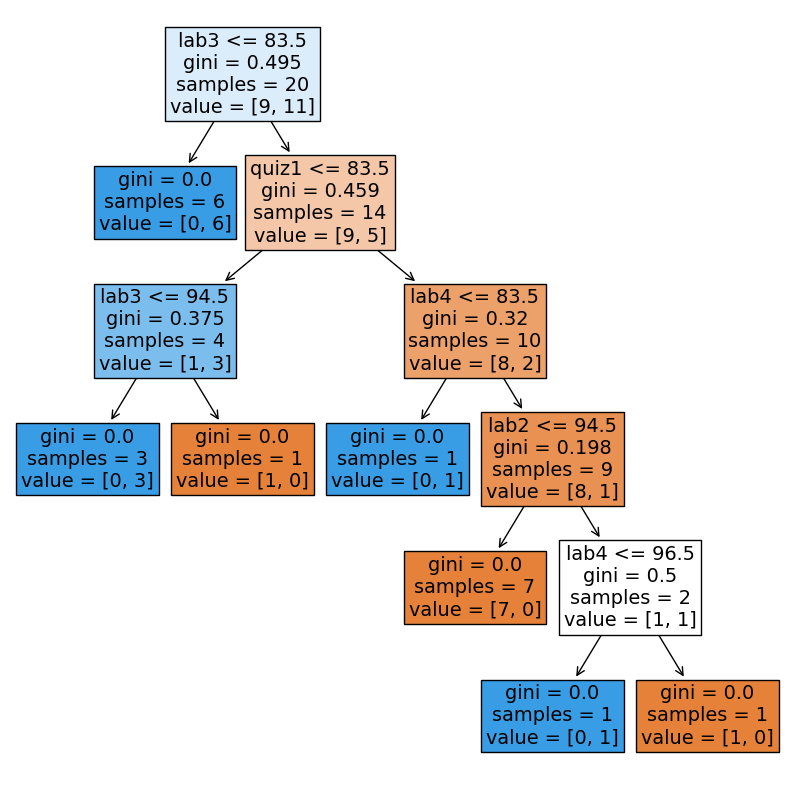

In [31]:
plt.figure(figsize=(10, 10))
tree.plot_tree(model, feature_names=X.columns, filled=True)

- With the default setting, the nodes are expanded until all leaves are "pure" (Zero Gini Impurity). 

- The decision tree is creating very specific rules, based on just one example from the data. 
- Is it possible to control the learning in any way? 
    - Yes! One way to do it is by controlling the **depth** of the tree, which is the length of the longest path from the tree root to a leaf.    

### Decision tree with `max_depth=1`

**Decision stump**
: A decision tree with only one split (depth=1) is called a **decision stump**. 

[Text(0.5, 0.75, 'lab3 <= 83.5\ngini = 0.495\nsamples = 20\nvalue = [9, 11]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.75, 0.25, 'gini = 0.459\nsamples = 14\nvalue = [9, 5]')]

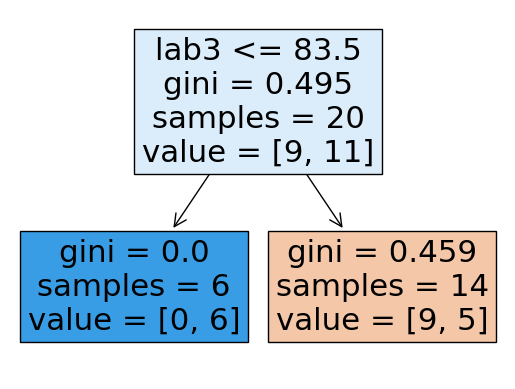

In [32]:
model = DecisionTreeClassifier(max_depth=1)
model.fit(X, y)
tree.plot_tree(model, feature_names=X.columns, filled=True)

`max_depth` is a **hyperparameter** of `DecisionTreeClassifier`. 

But, how good is this model?

In [33]:
# how good is this model on the training data?
score = model.score(X, y)
print('performance on training data:', score)
scores.insert(0, score)

performance on training data: 0.75


<br><br><br><br><br><br><br><br>
**Hyper-parameters (HParams)** are set by us!
<br><br><br><br><br><br><br><br>

### Decision tree with `max_depth=3`

[Text(0.375, 0.875, 'lab3 <= 83.5\ngini = 0.495\nsamples = 20\nvalue = [9, 11]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.5, 0.625, 'quiz1 <= 83.5\ngini = 0.459\nsamples = 14\nvalue = [9, 5]'),
 Text(0.25, 0.375, 'lab3 <= 94.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.75, 0.375, 'lab4 <= 83.5\ngini = 0.32\nsamples = 10\nvalue = [8, 2]'),
 Text(0.625, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.875, 0.125, 'gini = 0.198\nsamples = 9\nvalue = [8, 1]')]

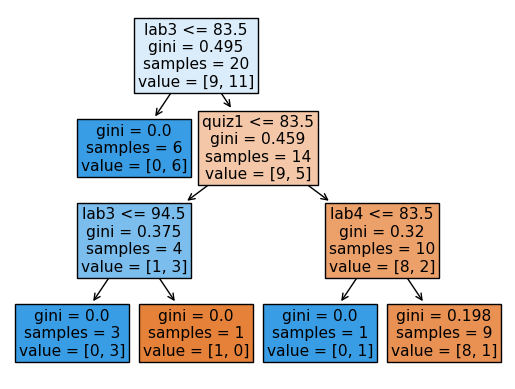

In [34]:
model = DecisionTreeClassifier(
    max_depth=3
)  # Let's try another value for the hyperparameter
model.fit(X, y)
tree.plot_tree(model, feature_names=X.columns, filled=True)

In [35]:
# how good is this model on the training data?
score = model.score(X, y)
print('performance on training data:', score)
scores.insert(1, score)

performance on training data: 0.95


-----------
Let's plot the scores we just calculated

/var/folders/0g/cybzqbz532b9hm0z1_98t1nc0000gn/T/ipykernel_526/3129494687.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['', 'one','', 'three','', 'six'])


Text(0, 0.5, 'score on training set')

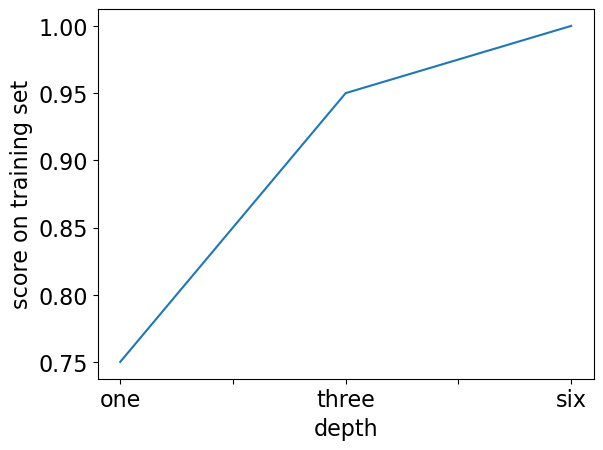

In [36]:
plt.plot(scores)
ax = plt.gca()
ax.set_xticklabels(['', 'one','', 'three','', 'six'])
ax.set_xlabel('depth')
ax.set_ylabel('score on training set')

<br><br><br><br><br><br><br><br><br>
In `sklearn` hyperparameters are set in the constructor. 
### Exercise 2.6: Is `depth` the only hyper-parameter of a Decision Tree?
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
<br><br><br><br><br><br><br><br><br>

<br><br><br><br><br><br><br><br>
**Parameters** are learned during the **training** process **to optimize a given criterion** (e.g. minimize Gini Impurity)

**Hyper-parameters** are set by us based on:
- expert knowledge
- heuristic
- systematic/automated optimization 


<br><br><br><br><br><br><br><br>

Above we looked at the `max_depth` hyperparameter. Some other commonly used hyperparameters of decision tree are:

- `criterion`
- `min_samples_split`
- `min_samples_leaf`
- `max_leaf_nodes`
- `class_weight`

## Final comments, summary, and reflection

What did we learn today? 

- There is a lot of terminology and jargon used in ML:
    - Features, target, examples, training
    - Supervised vs. Unsupervised machine learning     
    - Classification
    - Regression    
    - Accuracy and error    
    - Parameters and hyperparameters
    - Baselines

- Decision trees    
  - learn a hierarchy of if/else questions
  - make predictions by sequentially looking at features (from root to leaf) and checking if they pass a given condition
  - One way to control the complexity of decision tree models is by using the depth hyper-parameter (`max_depth` in `sklearn`). 

<br><br>

### Reflection

Write your reflections (takeaways, struggle points, and general comments) on this material in [the reflection Google Document](https://docs.google.com/document/d/1nxULx7x1vypTLfSbXGH8ONJQAYxk2IoSRKdb4iltixY/edit?usp=sharing) 

- This is a collaborative GoogleDoc where you all have edit access.
- I'll try to address those points in the next lecture. 

![](../img/eva-logging-off.png)
